<a href="https://colab.research.google.com/github/roshanrsahare/test-code/blob/main/CUSTUMER_CHURN%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing

# Data visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

# to split dataset to train and test
from sklearn.model_selection import train_test_split

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 

# scaling 
from sklearn.preprocessing import StandardScaler

# pipe
from sklearn.pipeline import Pipeline

# to tune the model parameters
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_churn.csv to train_churn.csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['train_churn.csv']))
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
df = df[['ID','Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category']]


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 519.7+ KB


In [ ]:
df.isnull().sum()


ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [ ]:
# checking for duplicated

sim = df.duplicated() 
sim.sum()

0

In [ ]:
# This visual check will ensure that there is no null value is replaced with some other value like :- -999,-0.1,-1

for feature in df.columns:
    print('*******','Column name:',feature,'*******')
    print(df[feature].unique())
    print('***********-end-***********')
    print(' ')

******* Column name: ID *******
['84e2fcc9' '57fea15e' '8df34ef3' ... 'd4075a95' '5855b142' '57b39511']
***********-end-***********
 
******* Column name: Age *******
[36 53 35 43 39 31 56 41 60 32 40 33 37 47 28 30 45 66 62 34 42 38 52 54
 27 68 58 59 25 26 48 29 44 67 49 63 55 46 65 57 23 50 51 71 69 61 64 24
 22 70 72 21]
***********-end-***********
 
******* Column name: Gender *******
['Female' 'Male']
***********-end-***********
 
******* Column name: Income *******
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
***********-end-***********
 
******* Column name: Balance *******
[563266.44 875572.11 701607.06 ... 979298.19 395233.65 826947.27]
***********-end-***********
 
******* Column name: Vintage *******
[4 2 0 1 3 5]
***********-end-***********
 
******* Column name: Transaction_Status *******
[0 1]
***********-end-***********
 
******* Column name: Product_Holdings *******
['1' '2' '3+']
***********-end-***********
 
******* Column name: Credit_Card *******
[0 1]
*

Exploratory Data Analysis

In [ ]:
#stats

round(df.describe(),2)


,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,6650.00,6650.00,6650.00,6650.00,6650.00
mean,41.13,804595.35,2.25,0.52,0.66
std,9.69,515754.87,1.46,0.50,0.47
min,21.00,63.00,0.00,0.00,0.00
25%,34.00,392264.21,1.00,0.00,0.00
50%,40.00,764938.58,2.00,1.00,1.00
75%,47.00,1147123.71,3.00,1.00,1.00
max,72.00,2436615.81,5.00,1.00,1.00


Customer Age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


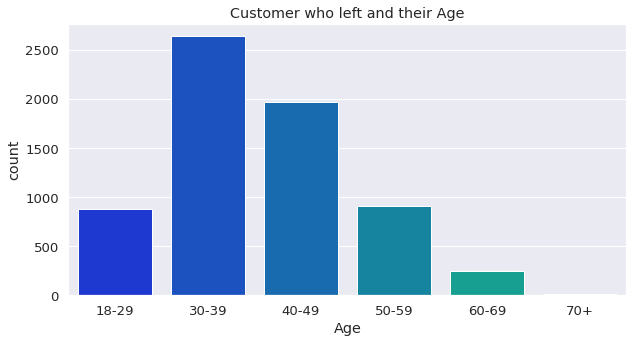

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 110]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age = pd.cut(df['Age'], bins, labels = labels,include_lowest = True)

plt.figure(figsize=(10,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(age,palette='winter');
plt.title('Customer who left and their Age');


Most of the customer who left the credit card service is from 30 to 40 age group and most of them are female customers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

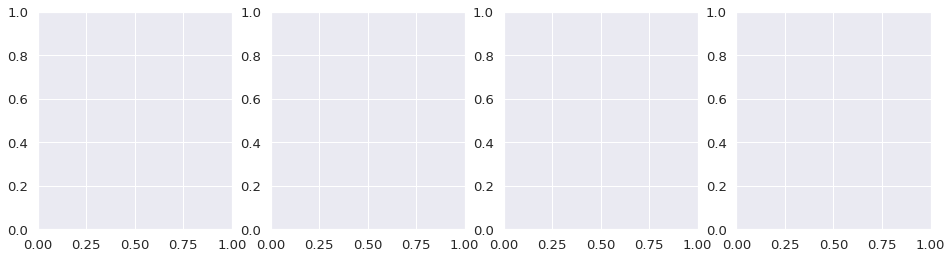

In [ ]:
# layout
fig, ax = plt.subplots(1,4,figsize=(16,4))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

# plot
sns.boxplot(['Age'],color='#05ffa1',ax = ax[0]);
sns.distplot(['Age'],ax = ax[1],color='#011efe',kde=False,bins=10);
sns.boxplot(['Age'],palette='rainbow',ax = ax[2]);
sns.distplot(['Age'],ax = ax[3],color='red',kde=False,bins=10);

# label
ax[0].title.set_text('1.1 Customer Age');
ax[1].title.set_text('1.2 Distribution of customer Age');
ax[2].title.set_text('1.3 Customer who left and their Age');
ax[3].title.set_text('1.4 Distribution of left customer Age');

plt.tight_layout();

print('Stats of Existing Customer Age',round(Existing_Customer['Age'].describe(),2))
print(' ')
print('Stats of Attrited Customer Age',round(left_customer['Age'].describe(),2))


SyntaxError: ignored

In [ ]:
# Income category

#plot data
plot_Credit_Category	= Credit_Category	[['Income','Gender','Credit_Category']].groupby(['Income','Gender']).count().reset_index()
plot_income_left.columns = ['Income_Category','Gender','count']
#plot_income_left = plot_income_left.sort_values('count')

plot_income = df[['Income','Gender','Credit_Category']].groupby(['Income','Gender']).count().reset_index()
plot_income.columns = ['Income','Gender','count']
#plot_income = plot_income.sort_values('count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(x='count',y='Income',data=plot_income, palette='winter', ax=ax[0],ci=False);
sns.barplot(x='count',y='Income', data=plot_income_left,palette='spring',hue='Gender', ax=ax[1],ci=False);
# title
ax[0].title.set_text('1.1 Income category of customer');
ax[1].title.set_text('1.2 Customer who left and their income category and Gender');

plt.tight_layout()



NameError: ignored